## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

![Screen%20Shot%202022-05-01%20at%2010.48.48.png](attachment:Screen%20Shot%202022-05-01%20at%2010.48.48.png)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

These are some (synthetic but realistic; see textbook) supernova data

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import random
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split

plt.rc('text', usetex=True)  # Abilita l'uso di LaTeX in tutte le stringhe di testo
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'


/home/ludovicarbone/astrostat_env/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
import numpy as np
import scipy
import astroML

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"astroML version: {astroML.__version__}")

NumPy version: 1.22.1
SciPy version: 1.7.3
astroML version: 1.0.2


(35.0, 50.0)

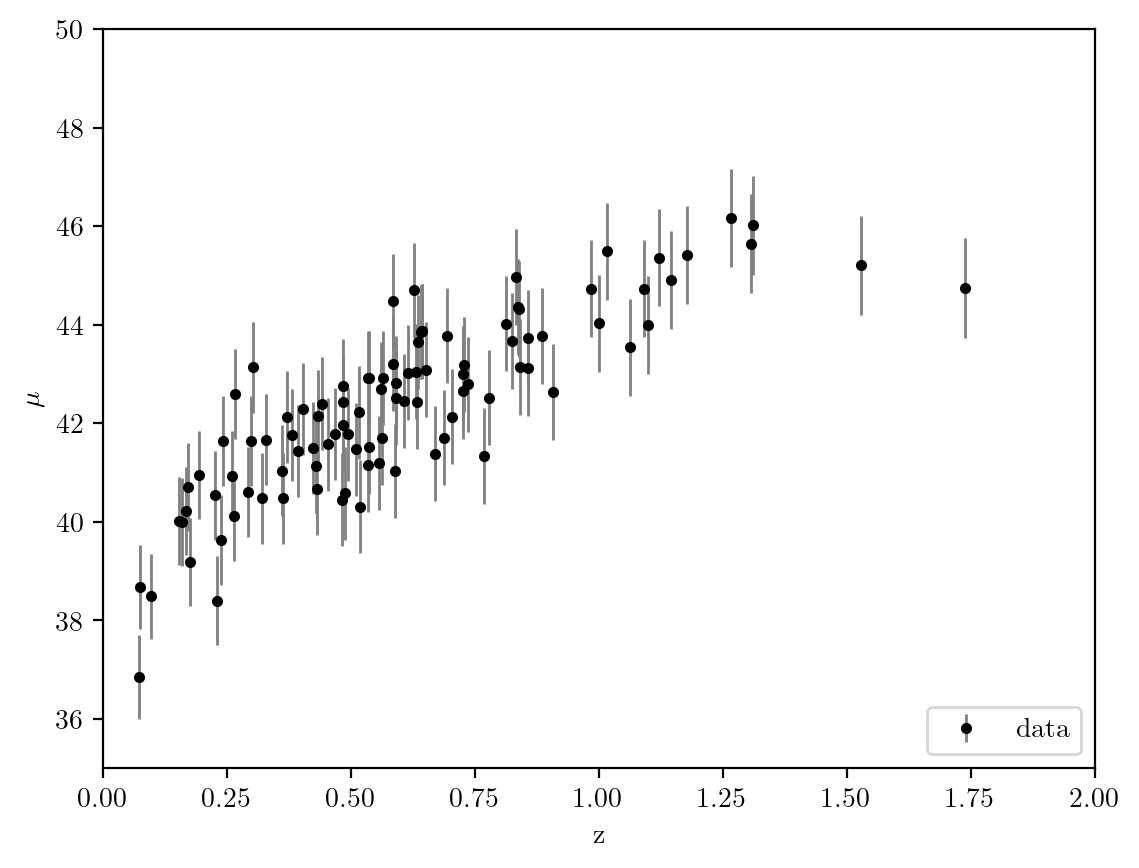

In [3]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?

plt.hist(dmu,histtype='step')
plt.xlabel('errors', fontsize=14)
plt.show()

So we are dealing with heteroschedastic errors

#### Linear Fit

In [4]:
z_sample = z_sample.reshape(-1, 1)  # z_sample now has shape (n_samples, 1)

model = LinearRegression()
model.fit(z_sample, mu_sample, dmu)

intercept = model.coef_[0]
slope = model.coef_[1]

print(f'Linear Model\nslope = {slope} - intercept = {intercept}')

Linear Model
slope = 4.764388647749797 - intercept = 39.483846022957295


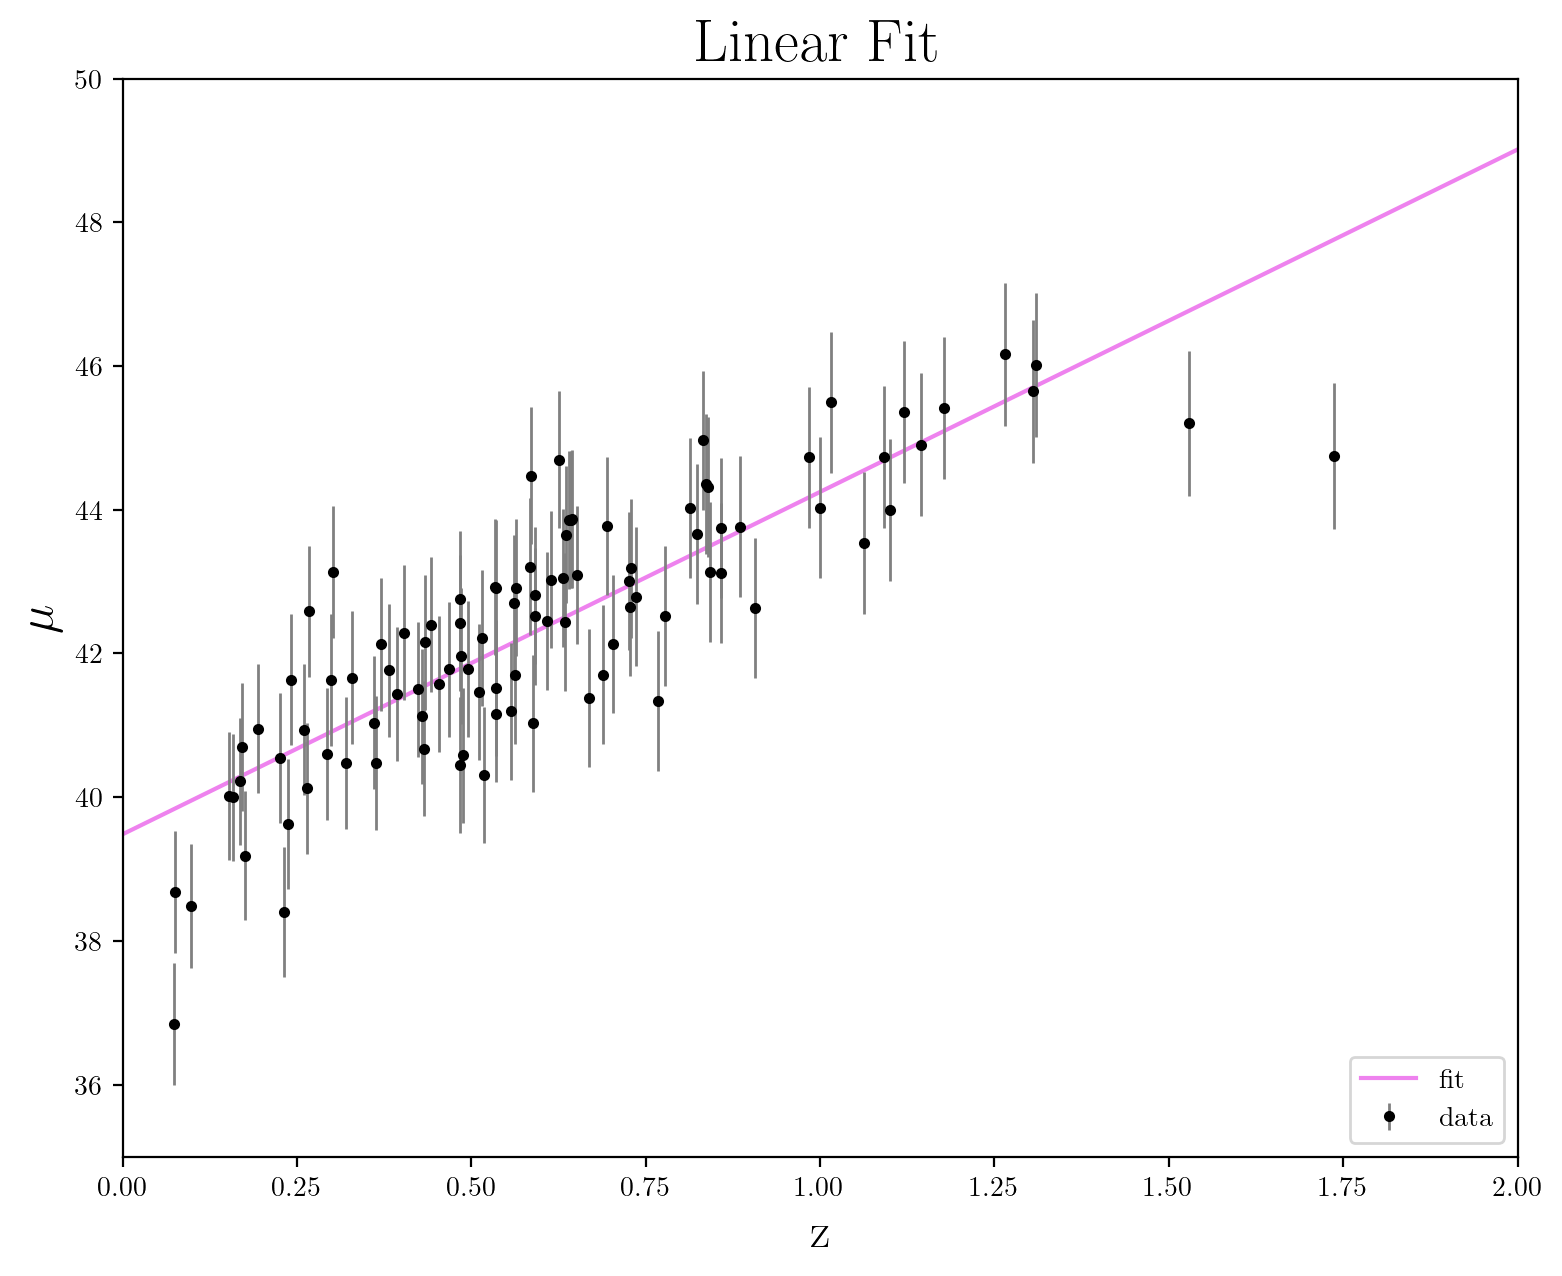

In [5]:
linear_model = lambda z: slope * z + intercept

z_fit = np.linspace(0,2,1000)

plt.figure(figsize=(9, 7))
plt.plot(z_fit, linear_model(z_fit), label='fit', color='violet')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$",  fontsize=18)
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

plt.title('Linear Fit',  fontsize=22)
plt.show()

#### Polynomial Fit

Polynomial Fit with 2 degrees
Parameters: 38.41, 8.60, -2.64

Polynomial Fit with 4 degrees
Parameters: 36.96, 21.50, -34.55, 28.77, -8.39

Polynomial Fit with 6 degrees
Parameters: 35.38, 43.13, -128.74, 210.25, -179.32, 76.99, -13.26

Polynomial Fit with 8 degrees
Parameters: 33.56, 76.71, -328.69, 732.80, -817.31, 366.64, 68.65, -116.43, 28.25

Polynomial Fit with 10 degrees
Parameters: 35.81, 16.23, 266.88, -2231.00, 7700.78, -14744.14, 17108.22, -12332.88, 5411.64, -1327.36, 139.98

Polynomial Fit with 12 degrees
Parameters: -9.28, 1556.46, -20610.84, 149870.46, -667699.36, 1938823.18, -3800879.02, 5115384.27, -4727709.23, 2945599.95, -1180865.10, 274748.28, -28165.33

Polynomial Fit with 14 degrees
Parameters: 83.92, -2271.67, 44561.47, -466207.60, 2982446.52, -12541304.16, 36218636.99, -73785125.72, 107548880.62, -112491954.10, 83661682.51, -43137614.32, 14645725.19, -2942265.90, 264770.68

Polynomial Fit with 16 degrees
Parameters: 15.88, 1064.34, -25060.75, 358806.98, -3275707

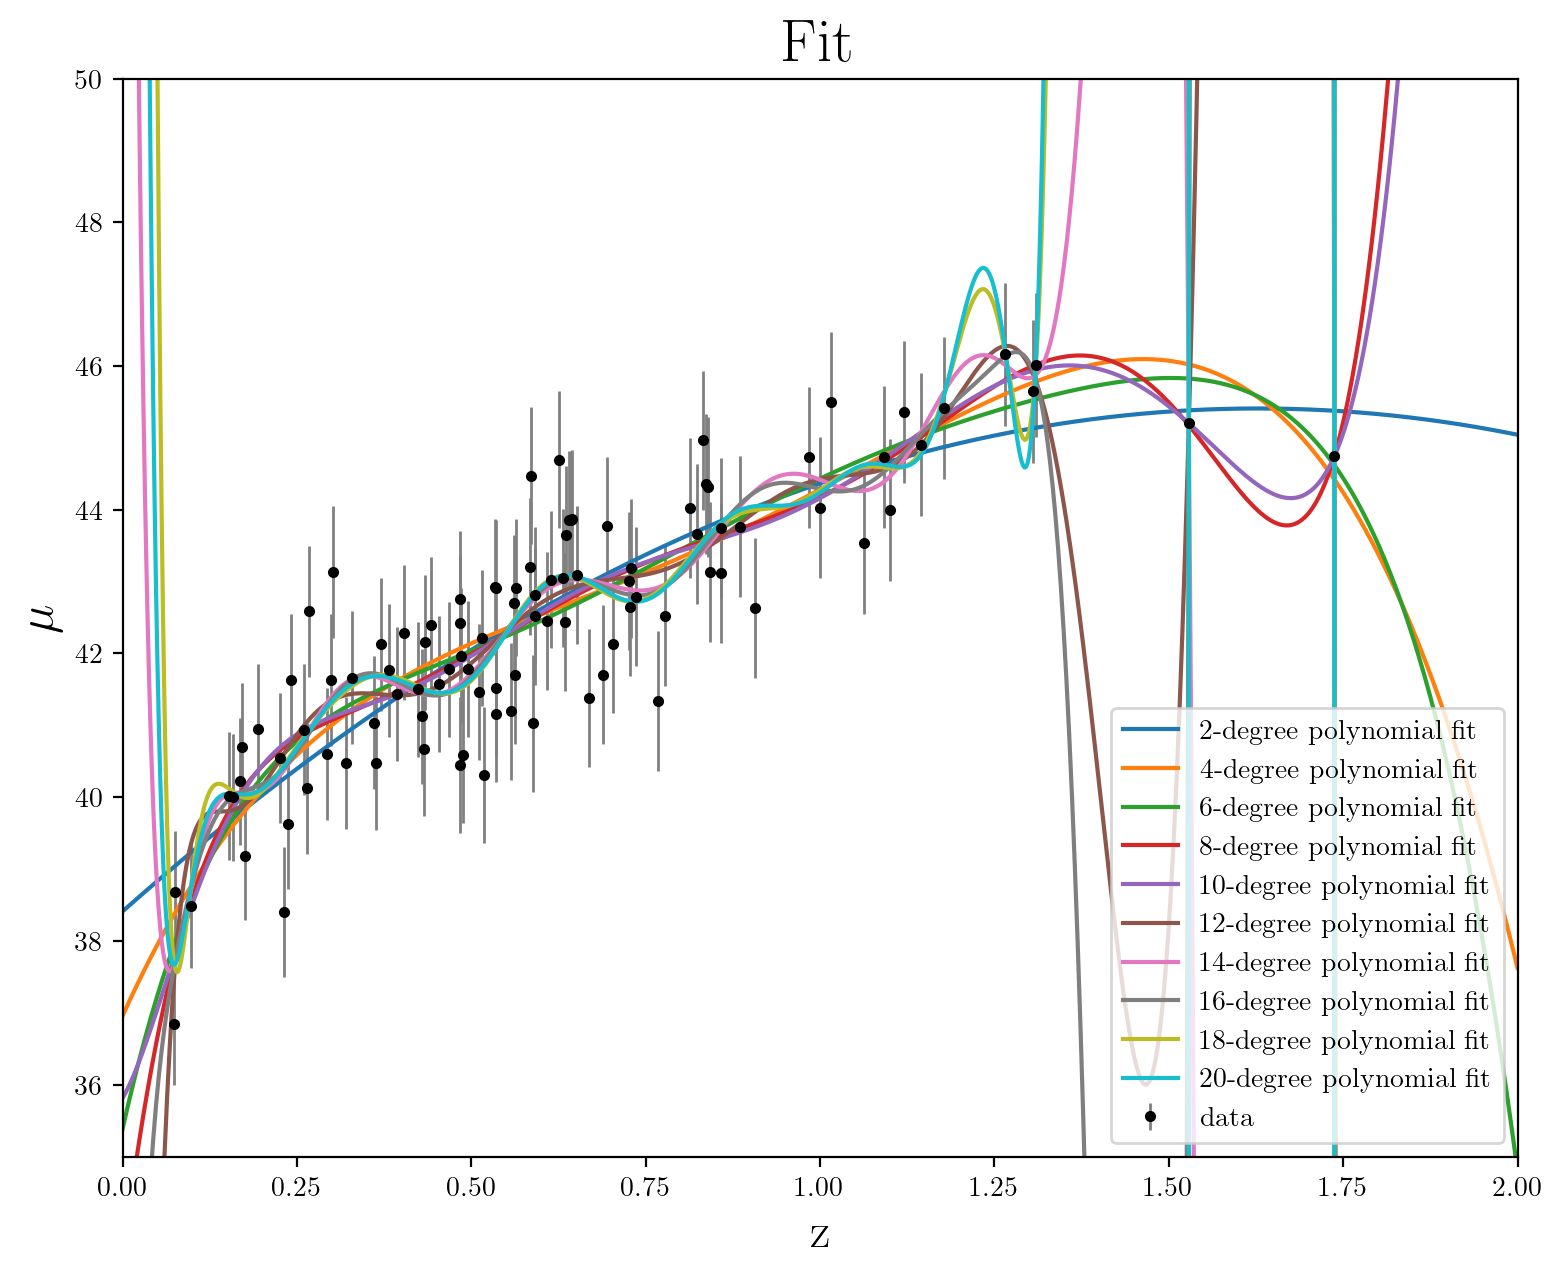

In [27]:
degrees =  np.linspace(2,20,10)

plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    

for d in degrees:
    
    model = PolynomialRegression(int(d)) 
    model.fit(z_sample, mu_sample, dmu)
    formatted_coefs = ', '.join([f'{coef:.2f}' for coef in model.coef_]) #to have only 2 decimals
    print(f'Polynomial Fit with {int(d)} degrees\nParameters: {formatted_coefs}\n')

    polynomial_model = lambda z: np.polyval(model.coef_[::-1], z)  # polyval wants coeff in descending power

    plt.plot(z_fit, polynomial_model(z_fit), label=f'{int(d)}-degree polynomial fit')

plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$", fontsize=18)
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Fit', fontsize=22)
plt.show()

Intuitively I would say that 2 degrees polynomial fits can fit well the data and so for the Occam's Razor I prefer the 2 degrees polynomial as a model.

- With the Linear Fit I am underfitting the data
- With Polynomial Fits with 5 degrees I am overfitting 

#### Tasks

- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

Best model 7.0 0.8967010244345648


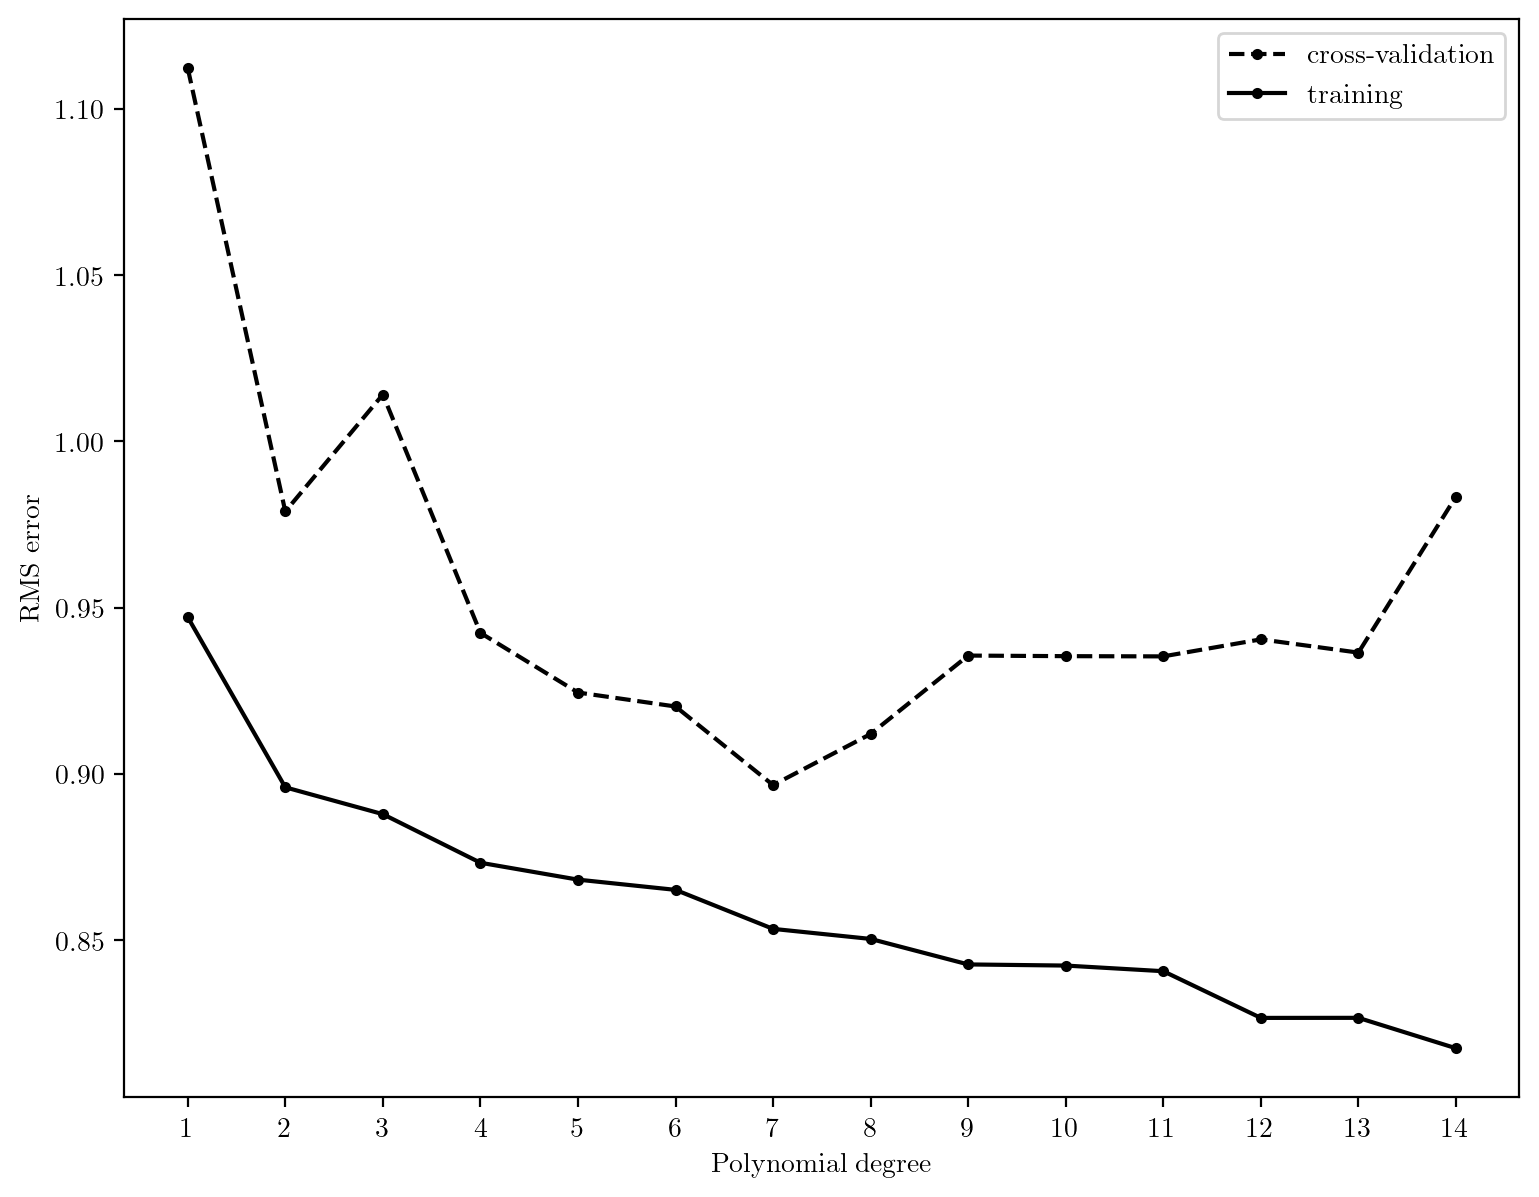

In [66]:
degrees =  np.linspace(1,14,14)

z_train, z_val, mu_train, mu_val, dmu_train, dmu_val = train_test_split(z_sample, mu_sample, dmu, test_size=0.3, random_state=7)
training_err = []
crossval_err = []

for d in degrees:
    model = PolynomialRegression(int(d)) 
    model.fit(z_train.reshape(-1, 1), mu_train, dmu_train) 
    
    train_pred = model.predict(z_train.reshape(-1, 1))
    val_pred = model.predict(z_val.reshape(-1, 1))
    
    training_err.append(np.sqrt(np.mean((train_pred - mu_train) ** 2)))
    crossval_err.append(np.sqrt(np.mean((val_pred - mu_val) ** 2)))

print("Best model", degrees[np.argmin(crossval_err)], min(crossval_err))

plt.figure(figsize=(9, 7))
plt.plot(degrees, crossval_err, '--k', marker='.', label='cross-validation')
plt.plot(degrees, training_err, '-k', marker='.', label='training')
plt.xlabel('Polynomial degree')
plt.ylabel('RMS error')
plt.xticks(degrees)
plt.legend(loc='upper right')
plt.show()

#### If you have time (or later at home...)

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.